In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [51]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                           random_state=42, class_sep=10)

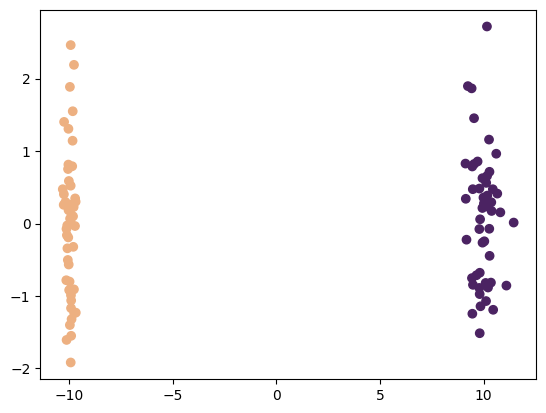

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="flare")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

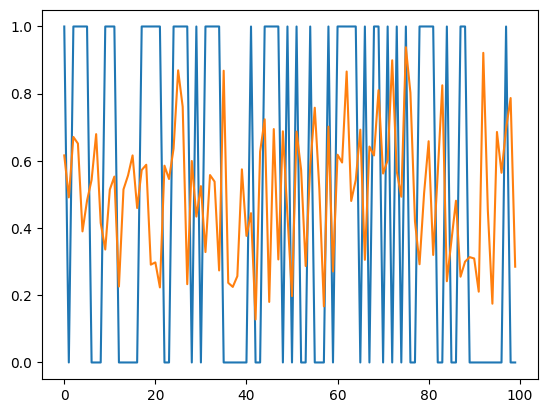

In [55]:
plt.plot(sigmoid(X))

In [63]:
class perceptron():

    def __init__(self, epochs, lr):

        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train,  0, 1, axis=1)

        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            j = np.random.randint(X_train.shape[0])

            y_hat = sigmoid(np.dot(X_train[j], weights))

            weights = weights - np.dot(self.lr, ((y_train[j] - y_hat))) * X_train[j]
    
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

        print(f"Coef_:{self.coef_}, Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = sigmoid(np.dot(X_test, self.coef_))
        return y_pred
    

In [71]:
percp = perceptron(lr=0.01, epochs=100)

In [72]:
percp.fit(X_train, y_train)

Coef_:[0.99845377 1.00021339], Intercept_: 1.0001312073248745


In [73]:
y_pred = percp.predict(X_test)

In [74]:
y_test

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [79]:
y_pred

array([2.58635497e-04, 2.34363601e-05, 5.59687074e-05, 9.99748278e-01,
       9.99990479e-01, 8.54594664e-05, 8.71972603e-05, 9.99979861e-01,
       9.99948734e-01, 9.99951876e-01, 9.99967673e-01, 6.15844074e-05,
       9.99965729e-01, 9.99982450e-01, 2.11429417e-05, 9.99946293e-01,
       1.47260129e-04, 4.08597889e-05, 1.85973879e-05, 9.99867739e-01])

In [80]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)

r2_score

0.9999999589738862